**This notebook assumes ...**

1) Basic familiarity with gwsurrogate as covered in basics.ipynb 

2) You've downloaded a non-spinning numerical relativity or EMRI surrogate. To see all available surrogates, check the surrogate repository by doing (from ipython) 

```python
>>> import gwsurrogate as gws
>>> gws.catalog.list()
>>> gws.catalog.pull("NAME OF SURROGATE MODEL TO DOWNLOAD")
```

In [1]:
### setup paths used throughout this notebook ###
import sys
path_to_gws = '/home/balzani57/Repo/GitRepos/Codes/gwsurrogate/gwsurrogate/'
#path_to_gws = '/data/tislam/git/BHPTNRSur1dq1e4_repo/test_for_gwsurrogate/'
sys.path.append(path_to_gws)

%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
import gwsurrogate as gws
import gwtools

import tqdm

setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


# Non-spinning surrogate models

This notebook shows how to use five different non-spinning models

A multi-mode NR surrogate covering mass ratios 1 to 10

1. SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0.h5

Two multi-mode EMRI surrogate models covering mass ratios 3 to $10^4$

2. EMRISur1dq1e4.h5
3. BHPTNRSur1dq1e4.h5

And two multi-mode NR surrogates that are the same physical model as 1, but using a "linear" (affine) representation needed for certain applications

4. SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0_FastSplined_WithVandermonde.h5
5. SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0_FastSplined_WithVandermonde_NewInterface.h5


Models 1, 2, and 3 use the same code at the beginning part of this notebook -- simply change the model's data file specified in the "load the surrogate data" cell below. 

Models 4 & 5 are covered near the end of this notebook.

In [2]:
# Absolute path to the surrogate hdf5 file. This notebook can be run with any of these models

#path_to_surrogate = path_to_gws+'surrogate_downloads/SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0.h5'
#path_to_surrogate = path_to_gws+'surrogate_downloads/SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0.h5'
path_to_surrogate = path_to_gws+'surrogate_downloads/BHPTNRSur1dq1e4.h5'
#path_to_surrogate = '/data/tislam/git/BHPTNRSur1dq1e4_repo/test_for_gwsurrogate/BHPTNRSur1dq1e4.h5'
#path_to_surrogate = '/data/tislam/git/BHPTNRSur1dq1e4_repo/test_for_gwsurrogate/BHPTNRSur1dq1e4.h5'
#path_to_surrogate = path_to_gws+'surrogate_downloads/EMRISur1dq1e4.h5'
#path_to_surrogate = '/data/tislam/works/EMRISurrogate/EMRISur1dq1e4.h5'

### load the surrogate data ###
model = gws.EvaluateSurrogate(path_to_surrogate, ell_m=[(2,2),(3,3)]) # load two m>0 modes only

loading surrogate mode... l2_m2

>>> Found surrogate ID from file name: BHPTNRSur1dq1e4

>>> Warning: Guessing quadrature weights to be identical with 0.200000
Cannot load greedy points...OK
Special case: using spline for parametric model at each EI node
num_fits_amp = 7
num_fits_phase = 7
setting norm fitparams to None...


/home/balzani57/Repo/GitRepos/Codes/gwsurrogate/gwsurrogate/surrogateIO.py:543: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.fitparams_amp = np.array(fitparams_amp)
/home/balzani57/Repo/GitRepos/Codes/gwsurrogate/gwsurrogate/surrogateIO.py:544: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.fitparams_phase = np.array(fitparams_phase)


loading surrogate mode... l3_m3

>>> Found surrogate ID from file name: BHPTNRSur1dq1e4

>>> Warning: Guessing quadrature weights to be identical with 0.200000
Cannot load greedy points...OK
Special case: using spline for parametric model at each EI node
num_fits_re = 13
num_fits_im = 13
setting norm fitparams to None...


/home/balzani57/Repo/GitRepos/Codes/gwsurrogate/gwsurrogate/surrogateIO.py:571: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.fitparams_re = np.array(fitparams_re)
/home/balzani57/Repo/GitRepos/Codes/gwsurrogate/gwsurrogate/surrogateIO.py:572: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.fitparams_im = np.array(fitparams_im)


Surrogate interval [[0.39794001]
 [4.        ]]
Surrogate time grid [-30500.         -30499.8        -30499.6        ...    114.40000011
    114.60000011    114.80000011]
Surrogate parameterization map from q to log10(q)
  
  Surrogates with this parameterization expect its user intput 
  to be the mass ratio q. 
  
  The surrogate will map q to the internal surrogate's 
  parameterization which is log10(q)
  
  The surrogates training interval is quoted in log10(q).
  


# Lesson 1: Simple evaluations

You have evaluated the (2,2) mode


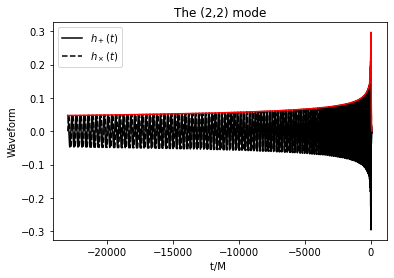

In [3]:
# Evaluate and plot the 2,2 mode. 
# By default, the modes are evaluated on the sphere, and negative modes are generated from 
# known relationships. So we need to set both options to false to get only the (2,2) mode.
modes, times, hp, hc = model(q=3.7, ell=[2], m=[2], mode_sum=False, fake_neg_modes=False)
print('You have evaluated the (%i,%i) mode'%(modes[0][0],modes[0][1]))

gwtools.plot_pretty(times, [hp, hc],fignum=1)
plt.plot(times,gwtools.amp(hp+1j*hc),'r')
plt.title('The (%i,%i) mode'%(modes[0][0],modes[0][1]))
plt.xlabel('t/M ')
plt.show()

Evaluated modes = [(2, 2), (3, 3), (2, -2), (3, -3)]


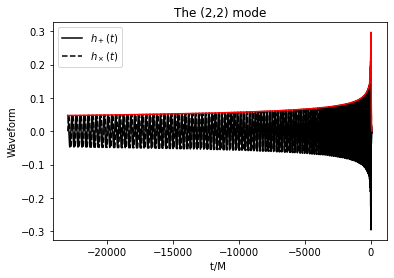

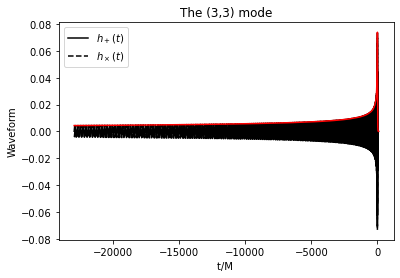

In [4]:
# generating both the (3,3) and (3,-3) modes is easy!
modes, times, hp, hc = model(q=3.7, ell=[3], m=[3], mode_sum=False)
print("Evaluated modes =", modes)

gwtools.plot_pretty(times, [hp[:,0], hc[:,0]],fignum=2)
plt.plot(times,gwtools.amp(hp[:,0]+1j*hc[:,0]),'r')
plt.xlabel('t/M ')
plt.title('The (%i,%i) mode'%(modes[0][0],modes[0][1]))

gwtools.plot_pretty(times, [hp[:,1], hc[:,1]],fignum=3)
plt.plot(times,gwtools.amp(hp[:,1]+1j*hc[:,1]),'r')
plt.title('The (%i,%i) mode'%(modes[1][0],modes[1][1]))
plt.xlabel('t/M ')
plt.show()

In [5]:
# Trying to evaluate a mode which doesn't exist throws a warning
model(q=3.7, ell=[3], m=[2], mode_sum=False, fake_neg_modes=False)

Warning: Your mode (ell,m) = (3,2) is not available!

# Lesson 2: Physical waveforms

In [6]:
# load all the modes 
# if using the NR surrogate, the (2,0) mode is excluded by default (See http://arxiv.org/abs/1502.07758 for why)

model = gws.EvaluateSurrogate(path_to_surrogate)

loading surrogate mode... l10_m8

>>> Found surrogate ID from file name: BHPTNRSur1dq1e4

>>> Warning: Guessing quadrature weights to be identical with 0.200000
Cannot load greedy points...OK
Special case: using spline for parametric model at each EI node
num_fits_re = 16
num_fits_im = 16
setting norm fitparams to None...


/home/balzani57/Repo/GitRepos/Codes/gwsurrogate/gwsurrogate/surrogateIO.py:571: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.fitparams_re = np.array(fitparams_re)
/home/balzani57/Repo/GitRepos/Codes/gwsurrogate/gwsurrogate/surrogateIO.py:572: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.fitparams_im = np.array(fitparams_im)


loading surrogate mode... l10_m9

>>> Found surrogate ID from file name: BHPTNRSur1dq1e4

>>> Warning: Guessing quadrature weights to be identical with 0.200000
Cannot load greedy points...OK
Special case: using spline for parametric model at each EI node
num_fits_re = 16
num_fits_im = 16
setting norm fitparams to None...
loading surrogate mode... l2_m1

>>> Found surrogate ID from file name: BHPTNRSur1dq1e4

>>> Warning: Guessing quadrature weights to be identical with 0.200000
Cannot load greedy points...OK
Special case: using spline for parametric model at each EI node
num_fits_re = 13
num_fits_im = 13
setting norm fitparams to None...
loading surrogate mode... l2_m2

>>> Found surrogate ID from file name: BHPTNRSur1dq1e4

>>> Warning: Guessing quadrature weights to be identical with 0.200000
Cannot load greedy points...OK
Special case: using spline for parametric model at each EI node
num_fits_amp = 7
num_fits_phase = 7
setting norm fitparams to None...


/home/balzani57/Repo/GitRepos/Codes/gwsurrogate/gwsurrogate/surrogateIO.py:543: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.fitparams_amp = np.array(fitparams_amp)
/home/balzani57/Repo/GitRepos/Codes/gwsurrogate/gwsurrogate/surrogateIO.py:544: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.fitparams_phase = np.array(fitparams_phase)


loading surrogate mode... l3_m1

>>> Found surrogate ID from file name: BHPTNRSur1dq1e4

>>> Warning: Guessing quadrature weights to be identical with 0.200000
Cannot load greedy points...OK
Special case: using spline for parametric model at each EI node
num_fits_re = 13
num_fits_im = 13
setting norm fitparams to None...
loading surrogate mode... l3_m2

>>> Found surrogate ID from file name: BHPTNRSur1dq1e4

>>> Warning: Guessing quadrature weights to be identical with 0.200000
Cannot load greedy points...OK
Special case: using spline for parametric model at each EI node
num_fits_re = 13
num_fits_im = 13
setting norm fitparams to None...
loading surrogate mode... l3_m3

>>> Found surrogate ID from file name: BHPTNRSur1dq1e4

>>> Warning: Guessing quadrature weights to be identical with 0.200000
Cannot load greedy points...OK
Special case: using spline for parametric model at each EI node
num_fits_re = 13
num_fits_im = 13
setting norm fitparams to None...
loading surrogate mode... l4_m2

In [9]:
# Evaluate the (2,2) mode for physical input values
M     = 115.0 # units of solar masses 
q     = 4.0
theta = np.pi/3.0
phi   = np.pi/3.0
dist  = 1.0 # units of megaparsecs
fmin  = 1.0 # units of hz

# The surrogate evaluation is NOT long enough to achieve a starting frequency of 1hz
modes,times,hp,hc = model(M=M,q=q,dist=dist,theta=theta,phi=phi,ell=[2],m=[2],mode_sum=False,fake_neg_modes=False,f_low=fmin)

Warning: starting frequency is 5.727509374376641

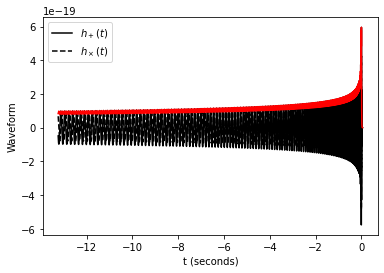

In [10]:
# We'll be safer with 15 hz 
fmin = 15

# Lets evaluate the (2,2) and (2,-2) at phi = theta = pi/3 on the sphere
times,hp,hc = model(M=M,q=q,dist=dist,theta=theta,phi=phi,ell=[2],m=[2],f_low=fmin)

gwtools.plot_pretty(times, [hp, hc])
plt.plot(times,gwtools.amp(hp+1j*hc),'r')
plt.xlabel('t (seconds)')
plt.show()

# Lesson 3: EMRI Surrogate vs NR

Here we repeat the experiment shown in Figure 3 (https://arxiv.org/pdf/1910.10473.pdf) which compares the EMRI surrogate model to Numerical Relativity waveforms in the range q <=10. 

Our numerical relativity waveforms will be generated using the NR surrogate model SpEC_q1_10_NoSpin.

**Note** (9/28/2022): The newest EMRI surrogate model is BHPTNRSur1dq1e4. Please see later on in this notebook for how to use this model

In [11]:
# gwtools is installed as a dependency of gwsurrogate -- used for optimization over time and phase shifts
from gwtools.gwtools import modes_list_to_dict, minimize_norm_error, euclidean_norm_sqrd, q_to_nu
from gwtools.mismatch import mathcal_E_error_from_mode_list

In [12]:
# load the emri and NR surrogate models
emri_modes = [(2,2),(2,1),(3,3),(3,1),(3,2),(4,4),(4,2),(4,3),(5,5),(5,3),(5,4)]

path_to_surrogate = gws.__path__[0]+'/surrogate_downloads/SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0.h5'
spec = gws.EvaluateSurrogate(path_to_surrogate, ell_m=emri_modes)

path_to_surrogate = gws.__path__[0]+'/surrogate_downloads/EMRISur1dq1e4.h5'
emri = gws.EvaluateSurrogate(path_to_surrogate) # load two m>0 modes only

loading surrogate mode... l2_m2

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode... l2_m1

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode... l3_m3

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode... l3_m1

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode... l3_m2

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode... l4_m4

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode... l4_m2

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loadin

/home/balzani57/Repo/GitRepos/Codes/gwsurrogate/gwsurrogate/surrogateIO.py:596: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.fitparams_amp = np.array(fitparams_amp)
/home/balzani57/Repo/GitRepos/Codes/gwsurrogate/gwsurrogate/surrogateIO.py:597: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.fitparams_phase = np.array(fitparams_phase)


loading surrogate mode... l2_m2

>>> Found surrogate ID from file name: EMRISur1dq1e4

>>> Warning: Guessing quadrature weights to be identical with 0.049805
Cannot load greedy points...OK
Cannot load eim points...OK
Special case: using spline for parametric model at each EI node
spline knots = 41, num_fits = 10
setting norm fitparams to None...
Time grid loaded with data type <class 'numpy.float32'>. Changing to float64...
Basis matrix loaded with data type <class 'numpy.float32'>. Changing to float64...
loading surrogate mode... l3_m1

>>> Found surrogate ID from file name: EMRISur1dq1e4

>>> Warning: Guessing quadrature weights to be identical with 0.049805
Cannot load greedy points...OK
Cannot load eim points...OK
Special case: using spline for parametric model at each EI node
spline knots = 41, num_fits = 10
setting norm fitparams to None...
Time grid loaded with data type <class 'numpy.float32'>. Changing to float64...
Basis matrix loaded with data type <class 'numpy.float32'>. C

In [13]:
# generate a q=8 EMRI and NR waveform -- decide on dimensionless or physical waveforms
q=8

## dimensionless waveforms ##
modes_spec, times_spec, hp_spec, hc_spec = spec(q=q, mode_sum=False, fake_neg_modes=False)
modes_emri, time_emri, hp_emri, hc_emri = emri(q, mode_sum=False, fake_neg_modes=False)
h_spec = hp_spec + 1.0j*hc_spec
h_emri = hp_emri + 1.0j*hc_emri
h_emri = modes_list_to_dict(modes_spec,h_emri)
h_spec = modes_list_to_dict(modes_spec,h_spec)
t_low_adj =5; t_up_adj = 2; # needed for minimization algorithm below

## physical waveforms ## 
#M     = 115.0 # units of solar masses 
#theta = np.pi/3.0; phi   = np.pi/3.0
#dist  = 1.0 # units of megaparsecs
#fmin  = 95.0 # units of hz
#t_low_adj =.2; t_up_adj = .01; # needed for minimization algorithm below
#modes_spec, times_spec, hp_spec, hc_spec = spec(M=M,q=q,dist=dist,theta=theta,phi=phi,\
#                                                ell=[2],m=[2],mode_sum=False,fake_neg_modes=False,\
#                                                f_low=fmin)
#modes_emri, time_emri, hp_emri, hc_emri = emri(M=M,q=q,dist=dist,theta=theta,phi=phi,\
#                                               ell=[2],m=[2],mode_sum=False,fake_neg_modes=False,\
#                                               f_low=fmin,\
#                                               times=times_spec,units='mks') # tests user-defined time grids
#h_spec={}; h_spec[(2,2)] = hp_spec + 1.0j*hc_spec
#h_emri={}; h_emri[(2,2)] = hp_emri + 1.0j*hc_emri

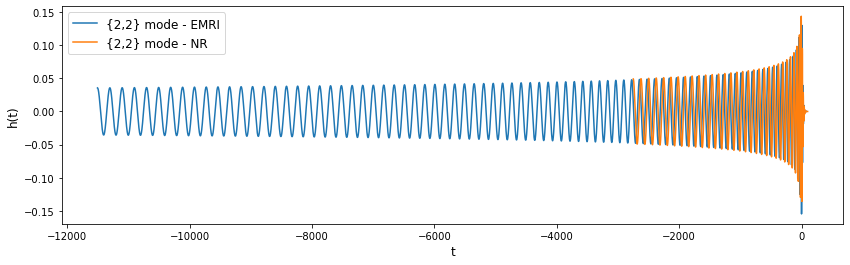

In [14]:
# waveforms have not yet been aligned in time and phase
plt.figure(figsize=(14,4))
plt.plot(time_emri,np.real(h_emri[(2,2)]),label='{2,2} mode - EMRI')
plt.plot(times_spec,np.real(h_spec[(2,2)]),label='{2,2} mode - NR')
plt.xlabel('t',fontsize=12)
plt.ylabel('h(t)',fontsize=12)
plt.legend(fontsize=12)
#plt.savefig('emri_sur_q_%f.png'%q)
#plt.xlim([-3000,200])
#plt.xlim([-1.6,0.1])
plt.show()

In [15]:
## here we minimize the error over time and phase shifts for the (2,2) mode only
[errors_before_min, errors_after_min], [tc, phic], [common_times,h_emri_aligned,h_nr_aligned] = \
minimize_norm_error(time_emri,h_emri[(2,2)],times_spec,h_spec[(2,2)],\
    euclidean_norm_sqrd,t_low_adj=t_low_adj,t_up_adj=t_up_adj,method='nelder-mead')
print(errors_before_min)
print(errors_after_min)
print(tc) # time shift needed
print(phic) # phase shift needed

0.25276545156693897
0.022793221248137003
-0.7338690666749164
-328.1817327749626


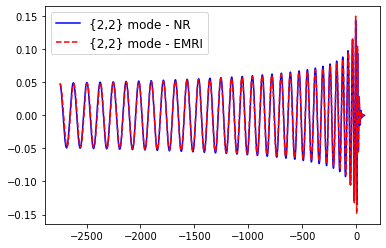

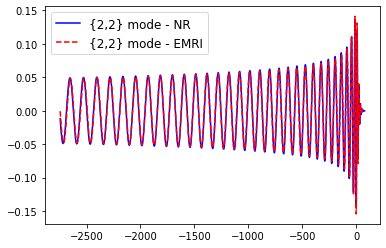

In [16]:
# plot waveforms after minimizations
plt.figure(1)
plt.plot(common_times, np.real(h_nr_aligned),'blue',label='{2,2} mode - NR')
plt.plot(common_times, np.real(h_emri_aligned),'r--',label='{2,2} mode - EMRI')
plt.legend(fontsize=12)

plt.figure(2)
plt.plot(common_times, np.imag(h_nr_aligned),'blue',label='{2,2} mode - NR')
plt.plot(common_times, np.imag(h_emri_aligned),'r--',label='{2,2} mode - EMRI')
plt.legend(fontsize=12)

# Lesson 4: Linear surrogates

Lessons 1 & 2 considered a nonlinear model: both EMRISur1dq1e4.hdf5 and SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0.h5 prescribes a nonlinear relationship between the strain, h, and the data pieces (the amplitude and phase of each harmonic mode) that are modeled. 

We call a surrogate linear if $h_{\ell m}$ if it can be expressed as a linear combination of basis functions

$$h_{\ell m} (t;q) = \sum_{i=1}^n c_{\ell m}^n(q) e_{\ell m}^n(t)$$

Some applications, like the RapidPE pipeline, [benefit from using a linear surrogate model](http://iopscience.iop.org/article/10.1088/1361-6382/aa7649/meta). These surrogates are also typically faster to evaluate. 

Here we consider two "linearized" (an admittedly poor modifier) versions of the surrogate SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0.h5. We simply show these models agree with one another, as they should

In [17]:
# reload all modes of the original nonlinear surrogate model, including the (2,0)
path_to_surrogate = path_to_gws+'surrogate_downloads/SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0.h5'
sur = gws.EvaluateSurrogate(path_to_surrogate,excluded=None)

loading surrogate mode... l2_m0

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode... l2_m1

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode... l2_m2

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode... l3_m1

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode... l3_m2

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode... l3_m3

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode... l4_m2

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loadin

### A Linear, fast-spline surrogate using the default gwsurrogate interface

In [18]:
# load the linear, fast-spline surrogate model
path_to_surrogate = "/home/balzani57/Repo/GitRepos/Codes/gwsurrogate/surrogate_downloads/SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0_FastSplined_WithVandermonde.h5"
sur_lin = gws.EvaluateSurrogate(path_to_surrogate,excluded=None)

OSError: Unable to open file (unable to open file: name = '/home/balzani57/Repo/GitRepos/Codes/gwsurrogate/surrogate_downloads/SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0_FastSplined_WithVandermonde.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [19]:
# check the original surrogate and linear "surrogate-of-a-surrogate" models agree
lm_modes, t, hreal_lin, himag_lin = sur_lin(1.2, mode_sum=False, fake_neg_modes=False)
lm_modes, t, hreal, himag = sur(q=1.2, mode_sum=False, fake_neg_modes=False)

plt.figure(1)
plt.plot(t, hreal[:, 2], 'k', label='Original amp/phase surrogate')
plt.plot(t, np.real(hreal_lin[:, 2]), 'r--', label='spline surrogate-of-a-surrogate')
plt.plot(t, (1000.0)* abs(hreal[:, 2] - np.real(hreal_lin[:, 2])), 'c', label=r'$1000 \times$ error')
plt.legend(frameon=False, loc='upper left')
plt.show()


# and make sure we get the (2, 0) mode as well
lm_modes, t, hreal, himag = sur_lin(1.0, mode_sum=False, fake_neg_modes=False)
print("evaluated (ell, m) modes =",lm_modes)

plt.figure(2)
h22 = hreal[:, 2] + 1.0j * himag[:, 2]
plt.plot(t, h22.real, 'b',label='real part of (2,2)')
plt.plot(t, h22.imag, 'r--',label='imaginary part of (2,2)')
plt.plot(t, np.abs(h22), 'k',label='amplitude of (2,2)')
plt.plot(t, hreal[:, 0], 'c', lw=2,label='real part of (2,0)')
plt.legend(frameon=False, loc='upper left')
plt.show()

NameError: name 'sur_lin' is not defined

In [20]:
# now perform a more complete error analysis
nqtest = 150
qtest = np.linspace(1., 10., nqtest)

def many_h_evals(qvals):
    """evalutate the original surrogate at many mass ratio values"""
    h_evals = []
    for i in tqdm.trange(len(qvals)):
        q = qvals[i]
        _, t, hreal, himag = sur(q, mode_sum=False, fake_neg_modes=False)
        h_evals.append( hreal + 1.j*himag )
    return h_evals

def waveform_norm(h):
    return np.sqrt(np.sum(abs(h**2)))

def waveform_error(h1, h2):
    return waveform_norm(h1 - h2) / waveform_norm(h1)

def test_spline_surrogate(spline_surrogate, nqtest, h_evals):
    qtest = np.linspace(1., 10., nqtest)
    errs = []
    for i in tqdm.trange(len(qtest)):
        q = qtest[i]
        h = h_evals[i]
        lm_modes, t, hreal, himag = spline_surrogate(q, mode_sum=False, fake_neg_modes=False)
        h_spline = hreal + 1.j*himag
        #h_spline = np.array([spline_modes[k] for k in lm_modes])
        errs.append(waveform_error(h, h_spline))
    return np.array(errs)

h_evals = many_h_evals(qtest)

loaded_err = test_spline_surrogate(sur_lin, nqtest, h_evals)
plt.semilogy(qtest, loaded_err, label='error')

100%|██████████| 150/150 [00:12<00:00, 12.34it/s]


NameError: name 'sur_lin' is not defined

### Linear, fast-spline surrogate using a new gws interface

In [ ]:
# FastTensorSplineSurrogate is a new feature
from gwsurrogate.new import surrogate 
loaded_surrogate = surrogate.FastTensorSplineSurrogate()

# ... and we load the linear (spline) surrogate in a different way
path_to_surrogate = '/home/balzani57/Repo/GitRepos/Codes/gwsurrogate/surrogate_downloads/'
loaded_surrogate.load(path_to_surrogate+"SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0_FastSplined_WithVandermonde_NewInterface.h5")

In [ ]:
# check the original and linear "surrogate-of-a-surrogate" models agree
h_modes = loaded_surrogate([1.2])
lm_modes, t, hreal, himag = sur(q=1.2, mode_sum=False, fake_neg_modes=False)

plt.plot(t, hreal[:, 2], 'k', label='Original amp/phase surrogate')
plt.plot(t, np.real(h_modes[2, 2]), 'r--', label='spline surrogate-of-a-surrogate')
plt.plot(t, abs(hreal[:, 2] - np.real(h_modes[2, 2])), 'c', label='error')
plt.legend(frameon=False, loc='upper left')
plt.show()

In [ ]:
## Compare the linear surrogate using new and original interfaces -- These should be EXACTLY identical 
h_modes = loaded_surrogate([10.0])

_, t, hreal, himag = sur_lin(q=10.0, mode_sum=False, fake_neg_modes=False)
h = hreal + 1.j*himag

plt.plot(t, hreal[:, 2], 'k', label='Original amp/phase surrogate')
plt.plot(t, np.real(h_modes[2, 2]), 'r--', label='spline surrogate-of-a-surrogate')
#plt.plot(t, abs(hreal[:, 2] - np.real(h_modes[2, 2])), 'c', label='error')
plt.legend(frameon=False, loc='upper left')
plt.show()

print np.max(abs(hreal[:, 2] - np.real(h_modes[2, 2])))

h_modes = np.array([h_modes[k] for k in lm_modes])

print waveform_error(h_modes, h.T)

In [ ]:
# ...and a more complete error analysis
errs = []

nqtest = 100
qtest = np.linspace(1., 10., nqtest)

for i in tqdm.trange(len(qtest)):
    q = qtest[i]

    h_modes = loaded_surrogate([q])

    _, t, hreal, himag = sur_lin(q=q, mode_sum=False, fake_neg_modes=False)
    h = hreal + 1.j*himag

    h_spline = np.array([h_modes[k] for k in lm_modes])
    errs.append(waveform_error(h_spline, h.T))
    
errs = np.array( errs )
plt.semilogy(qtest, errs, label='error')
# ... Why aren't the errors exactly zero? Its probably due to nudging
# where the end point parameters are not truely identical


## Lesson 5: Test against BHPTNRSurrogate

GWsurrogate hosts the model BHPTNRSur1dq1e4, which is identical to the one implemented in the [black hole perturbation toolkit](https://bhptoolkit.org/BHPTNRSurrogate/).

In this lesson, we will show how to evaluate both BHPTNRSur1dq1e4 models and check that they agree.

To run this notebook, you will need the BHPTNRSurrogate code:

```bash
git clone git@github.com:BlackHolePerturbationToolkit/BHPTNRSurrogate.git
```

In [6]:
# provide the path to the BHPTNRSurrogate directory
PATH_TO_BHPTNRSur = "/data/tislam/git/BHPTNRSurrogate"
path_to_surrogate = path_to_gws+'surrogate_downloads/BHPTNRSur1dq1e4.h5'
# add the path to the script directory
sys.path.append(PATH_TO_BHPTNRSur+"/surrogates")
import BHPTNRSur1dq1e4 as bhptsur

In [7]:
tsur, hsur = bhptsur.generate_surrogate(q=10, calibrated=True)

In [8]:
modes, times, hp, hc = model(q=10, ell=[2], m=[2], mode_sum=False, fake_neg_modes=False)
print('You have evaluated the (%i,%i) mode'%(modes[0][0],modes[0][1]))

You have evaluated the (2,2) mode


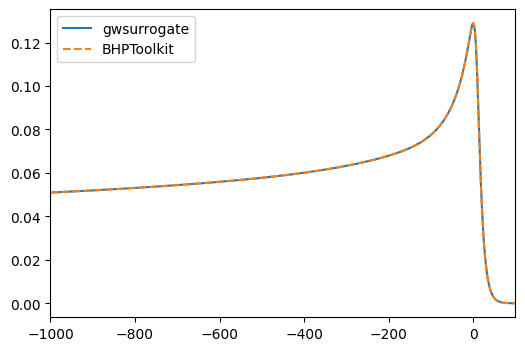

In [9]:
plt.figure(figsize=(6,4))
plt.plot(times, abs(hp + 1j*hc), label='gwsurrogate')
plt.plot(tsur, abs(hsur[(2,2)]), '--', label='BHPToolkit')
plt.xlim(-1000,100)
plt.legend()